In [2]:
import sys
import json
sys.path.append('..')
from src.analysis.model_performances import *
from src.common import *

from copy import deepcopy
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from helpers import *

In [4]:
answer_type = TRUE_FALSE_ANSWER_TYPE #FREE_ANSWER#
score_key = ACCURACY_SCORE_KEY #F1_SCORE_KEY#'accuracy'
answer_type_ext = tf_answer_type(score_key = score_key)

stats_all = collect_stats_all(tf_answer_type(score_key = score_key), save_main_dir=SAVE_MAIN_DIR)
print(len(stats_all))

save_dir = os.path.join(SAVE_MAIN_DIR, 'plots', 'by_length')
os.makedirs(save_dir, exist_ok=True)

100%|██████████| 62208/62208 [00:01<00:00, 42553.77it/s]

5415


In [23]:
prompt_type = 'few_shot_1'
subs = WITHOUT_RANDOM_SUB
ramifications = WITHOUT_RAMIFICATIONS
question_category = ALL_QUESTION_CATEGORIES_KEY
plan_lengths = [1, 10, 19]

# By Domain

In [24]:
# x = plan_lengths
# plt.figure()
#     
# for domain_type in [TRANSPORTATION_DOMAIN_KEY, NON_TRANSPORTATION_DOMAIN_KEY]:
#     y_by_domain = {}
#     y = []
#     y_error = []
#     for plan_length in plan_lengths:
#         out_obj = filter_single_selector(stats_all, plan_length, question_category, ramifications, model_name, prompt_type, domain_type, answer_type, subs)
#         y.append(out_obj['result'])
#         if out_obj['result']:
#             error = out_obj['result_other']['sem']
#         else:
#             error = 0
#         y_error.append(error)
#     y_by_domain[domain_type] = y
#     # plt.plot(x, y, 'o-', label=domain)
#     plt.errorbar(plan_lengths, y, yerr=y_error, capsize=3, fmt="o-", label=domain_type, ecolor = "black")
# 
#     
# # plt.ylim([0.59, 0.76])
# plt.xticks(plan_lengths)
# # plt.title(f'{model_name} {prompt_type} {subs} {ramifications}')
# plt.legend(fontsize=15)#, bbox_to_anchor=(1, 1))
# plt.xticks(size=15)
# plt.xlabel('Plan Length', size=15)
# plt.yticks(size=15)
# plt.ylabel('Accuracy [%]', size=15)
# os.makedirs(save_dir, exist_ok=True)
# 
# file_name = f'by_domain_type.{model_name}.{prompt_type}.{subs}.{ramifications}.{subs}.1-19'
# save_path = os.path.join(save_dir, f'{file_name}.pdf')
# plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')
# # plt.show()
# print(file_name.replace('.', ', ').replace('_', ' '))

In [25]:
# x = PLAN_LENGTHS
# 
# for domain_type, domain_ls in [(TRANSPORTATION_DOMAIN_KEY, TRANSPORTATION_DOMAINS), (NON_TRANSPORTATION_DOMAIN_KEY, NON_TRANSPORTATION_DOMAINS)]:
#     plt.figure()
#     y_by_domain = {}
#     for domain in domain_ls:
#         y = []
#         y_error = []
#         for plan_length in plan_lengths:
#             out_obj = filter_single_selector(stats_all, plan_length, question_category, ramifications, model_name, prompt_type, domain, answer_type, subs)
#             y.append(out_obj['result'])
#             if out_obj['result']:
#                 error = out_obj['result_other']['sem']
#             else:
#                 error = 0
#             y_error.append(error)
#         y_by_domain[domain] = y
#         # plt.plot(x, y, 'o-', label=domain)
#         plt.errorbar(plan_lengths, y, yerr=y_error, capsize=3, fmt="o-", label=domain, ecolor = "black")
# 
#     
#     # plt.ylim([0.59, 0.76])
#     plt.xticks(PLAN_LENGTHS)
#     # plt.title(f'{model_name} {prompt_type} {subs} {ramifications}')
#     plt.legend(fontsize=15, bbox_to_anchor=(1, 1))
#     plt.xticks(size=15)
#     plt.xlabel('Plan Length', size=15)
#     plt.yticks(size=15)
#     plt.ylabel(score_key, size=15)
#     os.makedirs(save_dir, exist_ok=True)
#     save_path = os.path.join(save_dir, f'{domain_type}.{answer_type}.{score_key}.{model_name}.{prompt_type}.{subs}.{ramifications}.1-19.pdf')
#     plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')
#     plt.show()

# By Question Category

question_category, ALL_DOMAINS, true_false_answer, accuracy, gpt-4o, few_shot_1, without_ramifications, 1-19


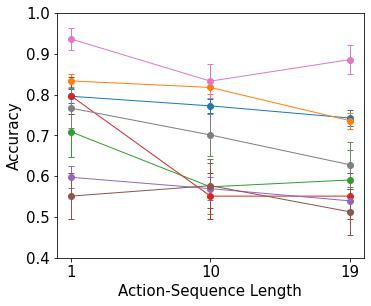

In [67]:
TO_PRETTY = {
    'object_tracking': 'Object Trk.',
    'fluent_tracking': 'Fluent Trk.',
    'state_tracking': 'State Trk.',
    'action_executability': 'Action Exec.',
    'effects': 'Effects of Ac.',
    'numerical_reasoning': 'Num. Reas.',
    'hallucination': 'Halluc.',
    'composite': 'Composite'}

model_name = 'gpt-4o' #'gemini'#'gemma-2b-it' 'gpt-4o' #'gemini' # 
ramifications = WITHOUT_RAMIFICATIONS
domain = ALL_DOMAINS_KEY

results_by_plan_length = {}
error_by_plan_length = {}
for plan_length in plan_lengths:
    results_by_cat = defaultdict(list)
    error_by_cat = defaultdict(list)
    for question_category in QUESTION_CATEGORIES:#[:-2]:
            res_obj = filter_single_selector(stats_all, plan_length, question_category, ramifications, model_name, prompt_type, domain, answer_type, subs)
            results_by_cat[question_category] = res_obj['result']
            error_by_cat[question_category] = res_obj['result_other']['sem']
    results_by_plan_length[plan_length] = results_by_cat
    error_by_plan_length[plan_length] = error_by_cat

    # plt.plot(plan_lengths, [0.5 for _ in range(len(plan_lengths))], linestyle='dashed', color='black')


plt.figure(figsize=(5.5,4.5))
for categoty in QUESTION_CATEGORIES:
    y = [results_by_plan_length[plan_length][categoty] for plan_length in plan_lengths]
    err = [error_by_plan_length[plan_length][categoty] for plan_length in plan_lengths]
    # plt.plot(plan_lengths, data, 'o-', label=categoty)
    plt.errorbar(plan_lengths, y, yerr=err, capsize=3, fmt="o-", label=TO_PRETTY[categoty], linewidth=1)#, ecolor = "grey")
    # plt.errorbar(plan_lengths, y, yerr=err, capsize=3)#, ecolor = "grey")
    

plt.ylim([0.4, 1])
plt.xticks(plan_lengths)
# plt.title(f'{domain} {model_name} {prompt_type} {ramifications}')
# plt.legend(fontsize=10, ncol=3, loc='upper center')#, loc=(1.04, 0))
plt.xticks(size=15)
plt.xlabel('Action-Sequence Length', size=15)
plt.yticks(size=15)
plt.ylabel(score_key.capitalize(), size=15)

file_name = f'question_category.{domain}.{answer_type}.{score_key}.{model_name}.{prompt_type}.{ramifications}.1-19'
save_path = os.path.join(save_dir, f'{file_name}.pdf')
plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')
# plt.show()
print(file_name.replace('.', ', '))

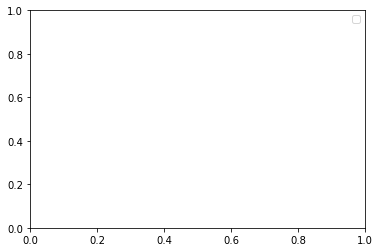

In [52]:
plt.legend()

In [ ]:
results_by_plan_length

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# 
# theta = np.arange(0, 2 * np.pi, np.pi / 4)
# r = theta / np.pi / 2 + 0.5
# 
# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(projection='polar')
# ax.errorbar(theta, r, yerr=0.1, fmt="o-", c="orangered")
# ax.set_title("Large radius error bars")
# plt.show()

import plotly.graph_objects as go

categories = ['processing cost','mechanical properties','chemical stability',
              'thermal stability', 'device integration']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=[results_by_plan_length[1][question_category] for question_category in QUESTION_CATEGORIES],
      theta=QUESTION_CATEGORIES,
      # fill='toself',
      name='1'
))
fig.add_trace(go.Scatterpolar(
      r=[results_by_plan_length[10][question_category] for question_category in QUESTION_CATEGORIES],
      theta=QUESTION_CATEGORIES,
      # fill='toself',
      name='10'
))
fig.add_trace(go.Scatterpolar(
      r=[results_by_plan_length[19][question_category] for question_category in QUESTION_CATEGORIES],
      theta=QUESTION_CATEGORIES,
      # fill='toself',
      name='19',
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
        range=[0, 1],
    )),
  showlegend=False
)

fig.show()

# By Ramifications

In [ ]:
subs = WITHOUT_RANDOM_SUB
question_category = ALL_QUESTION_CATEGORIES_KEY

In [ ]:
plt.figure()
domain = ALL_DOMAINS_KEY

results_by_cat = defaultdict(list)
error_by_cat = defaultdict(list)
for ramifications in RAMIFICATION_TYPES:
    for plan_length in plan_lengths:
        res_obj = filter_single_selector(stats_all, plan_length, question_category, ramifications, model_name, prompt_type, domain, answer_type, subs)
        results_by_cat[ramifications].append(res_obj['result'])
        error_by_cat[ramifications].append(res_obj['result_other']['sem'])
    
for categoty, data in results_by_cat.items():
    plt.errorbar(plan_lengths, data, yerr=error_by_cat[categoty], capsize=3, fmt="o-", label=categoty, ecolor = "black")

# plt.ylim([0.6, 0.7])
plt.xticks(plan_lengths)
# plt.title(f'{domain} {model_name} {prompt_type} {ramifications}')
plt.legend(fontsize=15)
plt.xticks(size=15)
plt.xlabel('Plan Length', size=15)
plt.yticks(size=15)
plt.ylabel(score_key, size=15)

file_name = f'by_ramifications.{domain}.{answer_type}.{score_key}.{model_name}.{prompt_type}.{ramifications}.1-19'
save_path = os.path.join(save_dir, f'{file_name}.pdf')
plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')
plt.show()

print(file_name.replace('.', ', ').replace('_', ' '))

In [ ]:
results_by_cat

# By Random Substitution

In [ ]:
model_name = 'gemini'#'gemma-2b-it'
prompt_type = 'few_shot_1'
question_category = ALL_QUESTION_CATEGORIES_KEY
ramifications = WITHOUT_RAMIFICATIONS

In [ ]:
for domain in [ALL_DOMAINS_KEY]: #[TRANSPORTATION_DOMAIN_KEY, NON_TRANSPORTATION_DOMAIN_KEY]: #ALL_DOMAINS_KEY DOMAIN_NAMES: 
    results_by_cat = defaultdict(list)
    error_by_cat = defaultdict(list)
    for subs in [WITH_RANDOM_SUB, WITHOUT_RANDOM_SUB]:
        for plan_length in plan_lengths:
            res_obj = filter_single_selector(stats_all, plan_length, question_category, ramifications, model_name, prompt_type, domain, answer_type, subs)
            if res_obj:
                results_by_cat[subs].append(res_obj['result'])
                error_by_cat[subs].append(res_obj['result_other']['sem'])

    plt.figure()
    # plt.plot(PLAN_LENGTHS, [0.5 for _ in range(len(PLAN_LENGTHS))], linestyle='dashed', color='black')
    
    for categoty, data in results_by_cat.items():
        plt.errorbar(plan_lengths, data, yerr=error_by_cat[categoty], capsize=3, fmt="o-", label=categoty, ecolor = "black")
    
    # plt.ylim([0.6, 0.7])
    plt.xticks(plan_lengths)
    # plt.title(f'{domain} {model_name} {prompt_type} {ramifications}')
    plt.legend(fontsize=15)
    plt.xticks(size=15)
    plt.xlabel('Plan Length', size=15)
    plt.yticks(size=15)
    plt.ylabel(score_key, size=15)
    
    save_name = f'by_random_subs.{domain}.{answer_type}.{score_key}.{model_name}.{prompt_type}.{ramifications}'
    save_path = os.path.join(save_dir, f'{save_name}.pdf')
    plt.savefig(save_path, transparent=True, format="pdf", bbox_inches='tight')
    # plt.show()
    print(save_name.replace('.', ', ').replace('_', ' '))
    # print('by plan length,', ', '.join(k.replace('_', ' ') for k in save_name.split('.')))